Exercice 2

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # pour résoudre les équations du mouvement (optionnel)


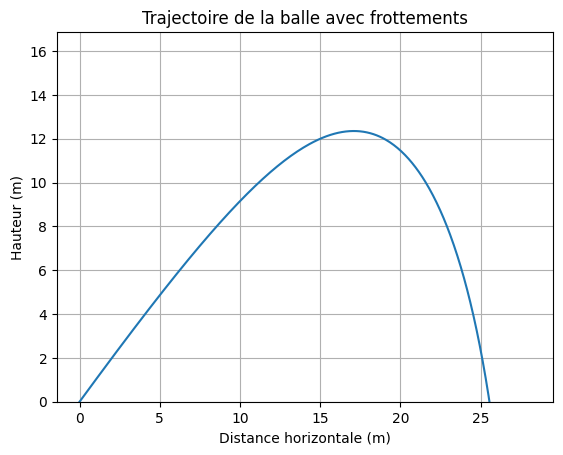

In [32]:
# Paramètres de la simulation
g = (0,-9.81)  # Accélération due à la gravité (m/s^2)
m = 0.145  # Masse de la balle (kg)
r_0 = (0,0) # Position initiale (x0, y0)
v0 = 50  # Vitesse initiale (m/s)
angle = 45  # Angle de lancement (degrés) (CHANGEABLE)
alpha = 0.01  # Coefficient de friction linéaire (kg/m) (CHANGEABLE)
beta = 0.01  # Coefficient de friction quadratique (kg/m) (CHANGEABLE)
v0x = v0 * np.cos(np.radians(angle))  # Composante x de la vitesse initiale
v0y = v0 * np.sin(np.radians(angle))  # Composante y de la vitesse initiale


def equations(t, y):
    vx, vy = y[2], y[3] # Vitesses en x et y
    v = np.sqrt(vx**2 + vy**2) # Vitesse totale

    if v == 0:
        ax, ay = 0, g[1]  # Si la vitesse est nulle, pas de frottement
    else:
        ax = - (alpha*v + beta*v**2) * (vx/v) / m # Accélération en x
        ay = g[1] - (alpha*v + beta*v**2) * (vy/v) / m # Accélération en y
    return [vx, vy, ax, ay] # Équations du mouvement
y0 = [r_0[0], r_0[1], v0x, v0y]  # Conditions initiales
t_span = (0, 10)  # Intervalle de temps pour la simulation
sol = solve_ivp(equations, t_span, y0, max_step=0.01, dense_output=True) # Résolution des équations du mouvement
plt.plot(sol.y[0], sol.y[1])
plt.title('Trajectoire de la balle avec frottements')
plt.xlabel('Distance horizontale (m)')
plt.ylabel('Hauteur (m)')
plt.ylim(bottom=0)
plt.grid()
plt.show()

Il est possible d'essailler plusieur combination d'angle et de frottement. Quand l'angle et a plus de 90° la balle va en arriere et a plus de 180 degré elle n'est plus visible car elle est dans le sol.

En desous j'ai mis quelques angles avec différents frottements: 

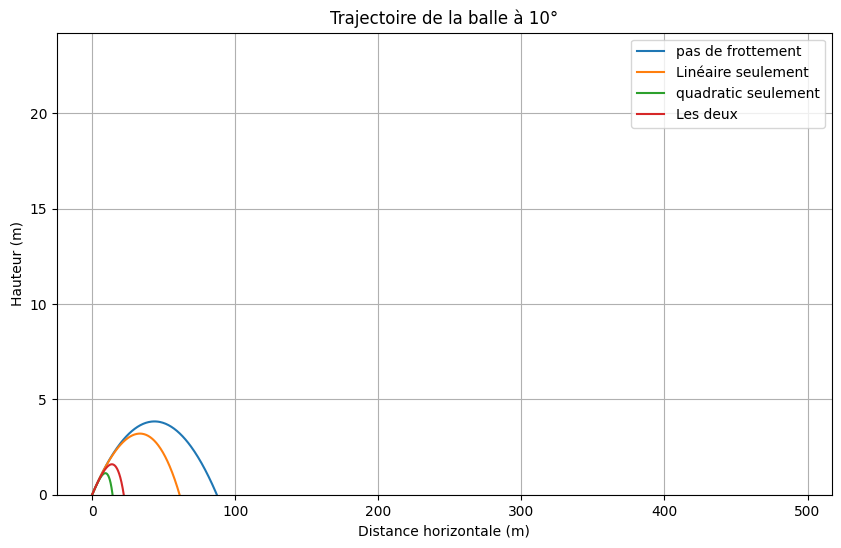

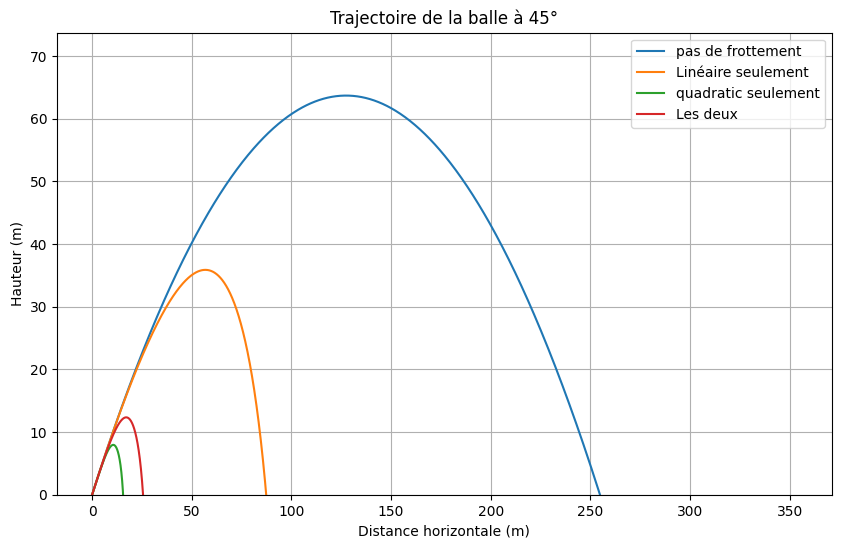

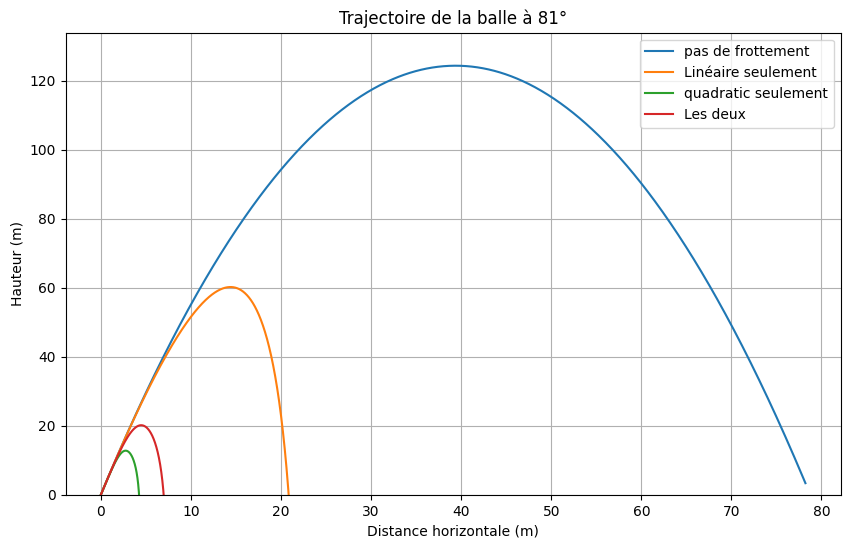

In [34]:
angles = [10, 45, 81] # Angles de lancement à tester
params = [
    ('pas de frottement', 0.0, 0.0), 
    ('Linéaire seulement', 0.05, 0.0), 
    ('quadratic seulement', 0.0, 0.02), 
    ('Les deux', 0.01, 0.01)]
for angle in angles: # Boucle sur les angles
    plt.figure(figsize=(10, 6))
    for label, alpha, beta in params: # Boucle sur les paramètres de frottement
        v0x = v0 * np.cos(np.radians(angle))
        v0y = v0 * np.sin(np.radians(angle))
        y0 = [r_0[0], r_0[1], v0x, v0y]
        
        def equations(t, y): # Redéfinition des équations pour chaque paramètre
            vx, vy = y[2], y[3] # Vitesses en x et y
            v = np.sqrt(vx**2 + vy**2)
            if v == 0:
                ax, ay = 0, g[1] # Si la vitesse est nulle, pas de frottement
            else:
                ax = - (alpha*v + beta*v**2) * (vx/v) / m # Accélération en x
                ay = g[1] - (alpha*v + beta*v**2) * (vy/v) / m # Accélération en y
            return [vx, vy, ax, ay]
        
        sol = solve_ivp(equations, t_span, y0, max_step=0.01, dense_output=True) # Résolution
        plt.plot(sol.y[0], sol.y[1], label=label)
    
    plt.title(f'Trajectoire de la balle à {angle}°')
    plt.xlabel('Distance horizontale (m)')
    plt.ylabel('Hauteur (m)')
    plt.ylim(bottom=0)
    plt.legend()
    plt.grid()
    plt.show()

On peut voir que le frottement quadratique est très fort comparé au frottement linéaire. 